# 1. Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.models import load_model

# 2. Data Collection

In [ ]:
#Load data, face images and their target i.e. perosn number
data = np.load("/kaggle/input/olivetti-faces/olivetti_faces.npy")
target = np.load("/kaggle/input/olivetti-faces/olivetti_faces_target.npy")

In [ ]:
#print the size of data and target
#Data has 400 images of size 64 x 64 pixels (grayscale)
#Target has information about class of all 400 images
print(data.shape)
print(target.shape)

(400, 64, 64)
(400,)


In [ ]:
#Identity number of unique persons (ids) in the trarget data
#For ORL / Olivetti face dataset this there are 40 people
#The dataset contains 10 images of each person. Therefore 40 x 10 = 400 images
unique_ids=np.unique(target)
print(len(unique_ids))

40


# 3. Visualization to Show Data

Text(0.5, 0.98, 'There are 40 distinct people with Id in the dataset ')

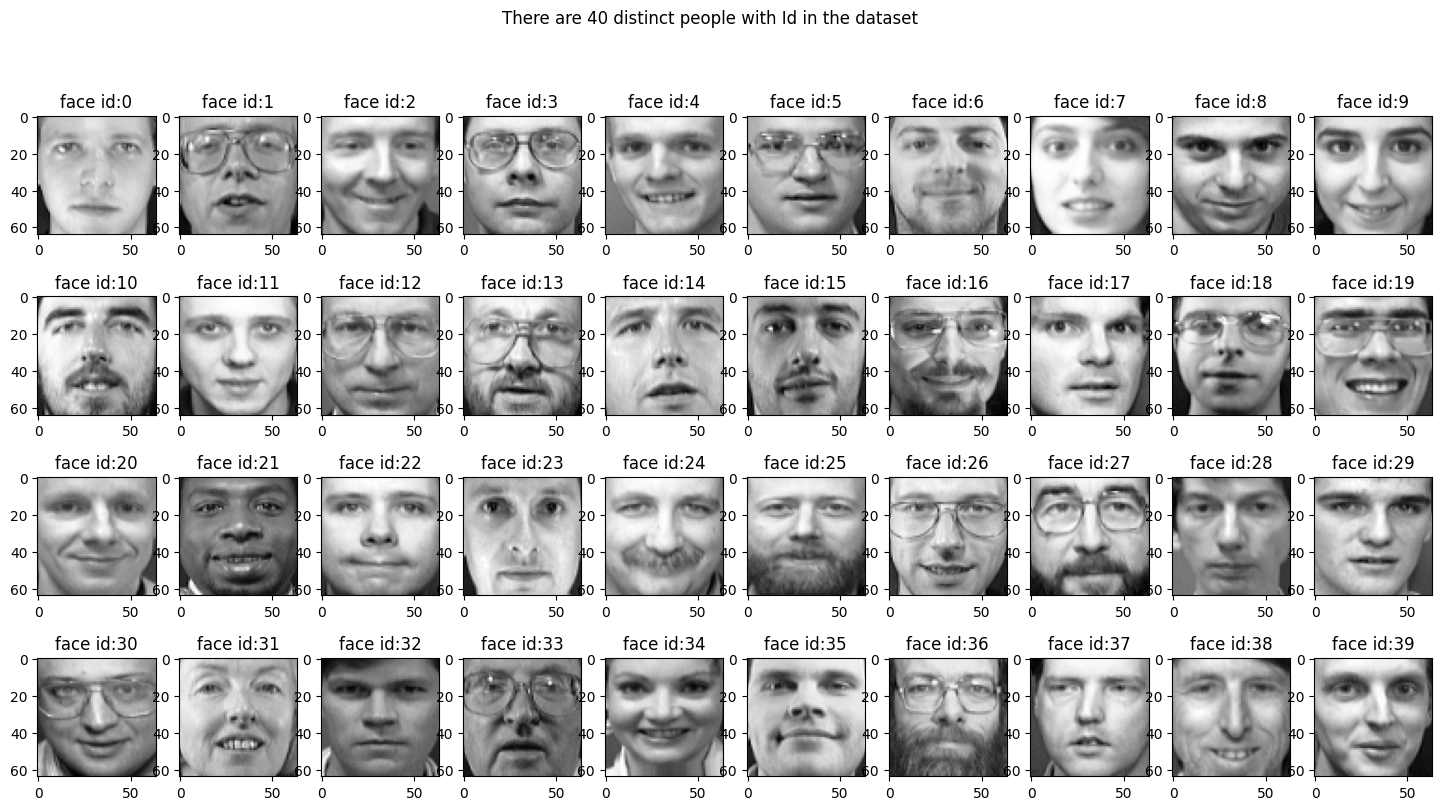

In [ ]:
#Display one sample image for each person
#Display the 40 images in 4 rows with each row having 10 images
fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
axarr = axarr.flatten()
imgs=data
for id in unique_ids:
    img_id = id * 10
    axarr[id].imshow(imgs[img_id], cmap='gray')
    axarr[id].set_title("face id:{}".format(id))
plt.suptitle("There are 40 distinct people with Id in the dataset ")

(64, 64)


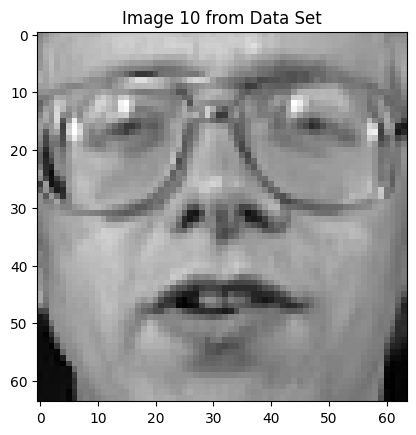

In [ ]:
imgs=data
print(imgs[10].shape)
# Display the image using Matplotlib
plt.imshow(imgs[10], cmap='gray')  # Assuming the image is grayscale
plt.title(f"Image {10} from Data Set")
plt.show()

Text(0.5, 0.98, 'There are all 10 images of first 5 people ')

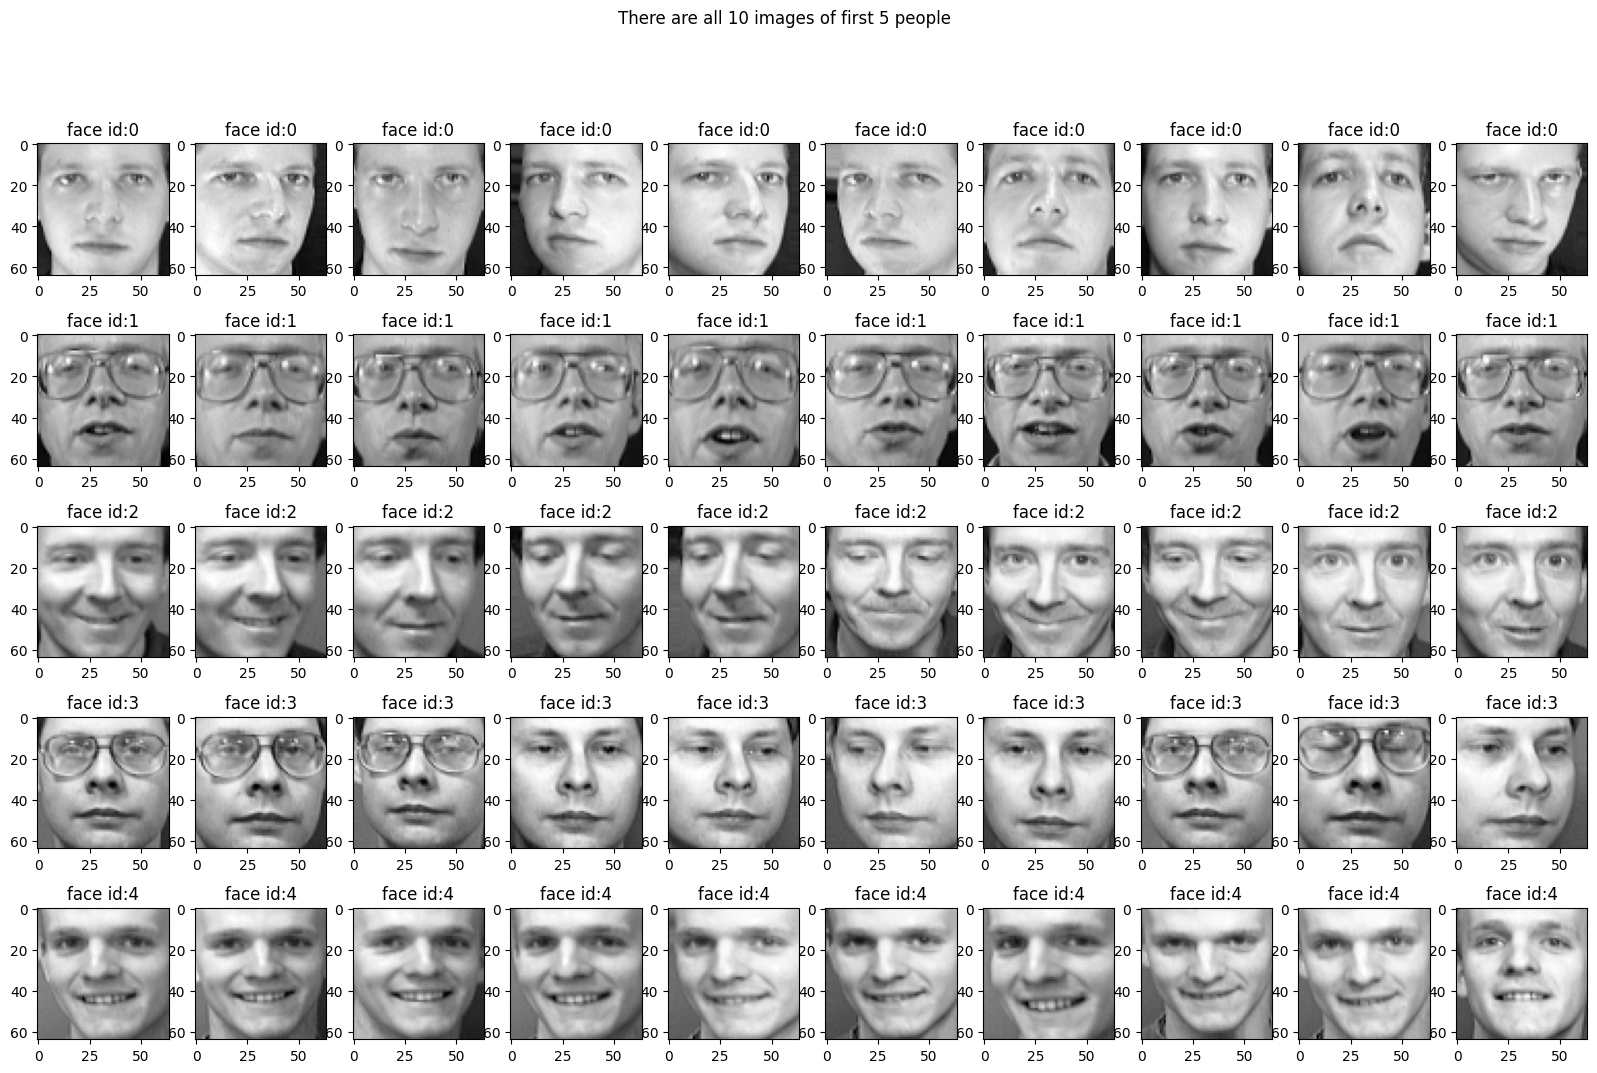

In [ ]:
cols = 10
subject_ids=[0, 1, 2, 3, 4]
rows = (len(subject_ids)*10)//cols
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 12))
for i, subject_ids in enumerate(subject_ids):
    for j in range(cols):
        img_id = subject_ids*10 + j
        axarr[i, j].imshow(imgs[img_id], cmap='gray')
        axarr[i,j].set_title("face id:{}".format(subject_ids))
plt.suptitle("There are all 10 images of first 5 people ")

# 4. Preprocessing

In [ ]:
data_flat = data.reshape(data.shape[0], -1)

# 4. Feature Extraction

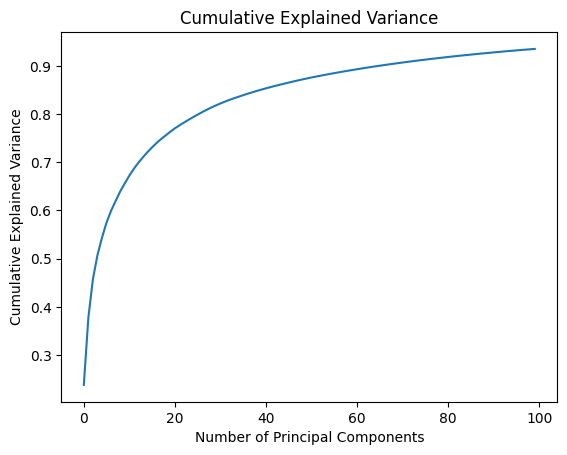

In [ ]:
# Apply PCA for feature extraction
num_components = 100  # Choose the number of principal components
# Flatten each image
pca = PCA(n_components=num_components)
data_pca = pca.fit_transform(data_flat)

# Visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance)
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# 5. Splitting Data

In [ ]:
#Split the data into test and train data. Select test size = 20%
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)

X_train, X_test, Y_train, Y_test = train_test_split(data_pca, target, test_size = 0.2, random_state= 0)

In [ ]:
#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

*** 5.1 One Hot Encoding***

In [ ]:

target = to_categorical(target, len(np.unique(target)))

In [ ]:
#Use sklearn library to split data into trianing and testing set
#X_train contains the image information and Y_train contains the target label (class)
X_train, X_test, Y_train, Y_test = train_test_split(data_pca, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)

# 6. Saving Image To Test GUI

In [ ]:
# Choose an index from the test set
index_to_save = 5  # Change this index to the one you want to save

# Get the image from the test set
image_to_save = X_test[index_to_save]

# Specify the file path where you want to save the .npy file
file_path_npy = "/kaggle/working/test_image_to_save.npy"  # Change this path as needed

# Flatten the image to a 1D array before saving
image_flattened = image_to_save.flatten()

# Save the flattened image as a .npy file
np.save(file_path_npy, image_flattened)

print(f"Image saved to {file_path_npy} as a .npy file.")

Image saved to /kaggle/working/test_image_to_save.npy as a .npy file.


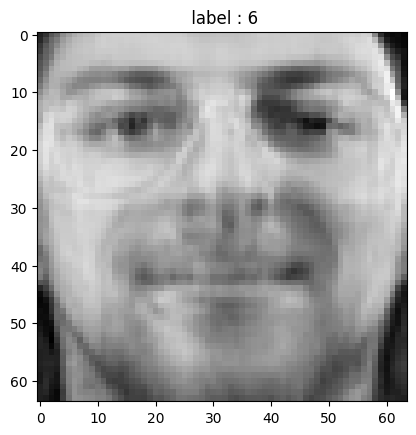

In [ ]:


# Specify the file path of the .npy file
file_path_npy = "/kaggle/working/test_image_to_save.npy"  # Change this path as needed

# Load the flattened image from the .npy file
image_flattened = np.load(file_path_npy)
image_flattened = pca.inverse_transform(image_flattened)

# Assuming the original shape of the image is (64, 64) for grayscale
original_shape = (64, 64)

# Reshape the flattened image back to its original shape
image = image_flattened.reshape(original_shape)

# Display the image using Matplotlib
plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
plt.title(f" label : {np.argmax(Y_test[5])}")
plt.show()

In [ ]:
target.shape

(400, 40)

In [ ]:
# Remember the third dimension is important for keras so specify that third dimension is 1
# X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
# X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
# X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)
# Reshape PCA-transformed data for the model
original_shape = data.shape[1:]  # Assuming (64, 64)
X_train = X_train.reshape(-1, num_components)
X_val = X_val.reshape(-1, num_components)
X_test = X_test.reshape(-1, num_components)

# Feedforward ANN

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(250,150,100),
                        max_iter = 300,
                        activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(250, 150, 100), max_iter=300)

In [ ]:
y_pred = mlp_clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.82


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.50      0.67         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      0.67      0.80         3
          16       0.00      0.00      0.00         0
          17       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


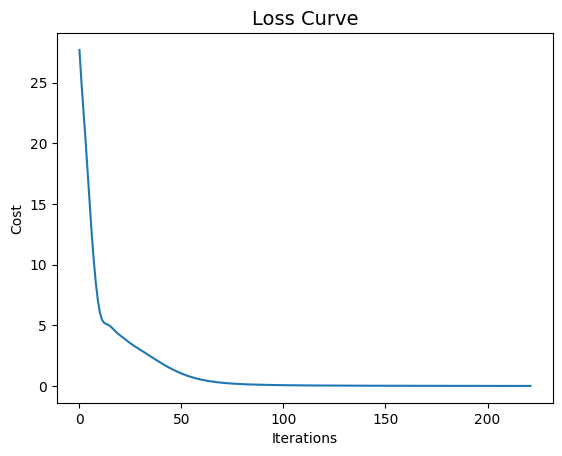

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Hyper Parameter Tuning

In [ ]:
param_grid = {
    "hidden_layer_sizes": [(128, 64), (256, 128), (512, 256)],
    "activation": ["tanh", "relu"],
    "solver": ["adam", "lbfgs" ,"sgd"],
    "max_iter": [75,100,150,200,300, 500, 700],
    "early_stopping": [True],
}

In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, cv=5)
grid.fit(X_train, Y_train)

print(grid.best_params_)

In [ ]:
best_mlp_model = grid.best_estimator_
best_mlp_model.fit(X_train, Y_train, validation_data=(X_val, Y_val))


TypeError: BaseMultilayerPerceptron.fit() got an unexpected keyword argument 'validation_data'

In [ ]:
grid_predictions = grid.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, grid_predictions)))

Accuracy: 0.95


In [ ]:

best_mlp_model = grid.best_estimator_
# Convert the MLPClassifier to a Keras Sequential model
keras_model = keras.models.Sequential()
keras_model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

for i in range(len(best_mlp_model.coefs_)):
    layer = keras.layers.Dense(
        units=best_mlp_model.coefs_[i].shape[1],
        activation=best_mlp_model.activation,
        weights=[best_mlp_model.coefs_[i], best_mlp_model.intercepts_[i]]
    )
    keras_model.add(layer)

# Save the Keras model to an HDF5 file
keras_model.save('/kaggle/working/best_mlp_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Vanilla NN

In [ ]:
# Define the architecture of the vanilla neural network
model = Sequential()

# Flatten the input image
model.add(Flatten(input_shape=(num_components,)))

# Add a fully connected layer with 256 neurons and a relu activation function
model.add(Dense(512, activation='relu'))

# Add a fully connected layer with 256 neurons and a relu activation function
model.add(Dense(256, activation='relu'))

# Add a fully connected layer with 256 neurons and a relu activation function
model.add(Dense(128, activation='relu'))

# Add another fully connected layer with 128 neurons and a relu activation function
model.add(Dense(64, activation='relu'))

# Add another fully connected layer with 64 neurons and a relu activation function
model.add(Dense(64, activation='relu'))

# Add another fully connected layer with 32 neurons and a relu activation function
model.add(Dense(32, activation='relu'))

# Add another fully connected layer with 16 neurons and a relu activation function
model.add(Dense(16, activation='relu'))

# Add the output layer with 40 neurons (output classes) and a softmax activation function
model.add(Dense(40, activation='softmax'))

# Compile the model using categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Print a summary of the model
model.summary()

In [ ]:
#Train the network using the above deinfed network architecture and give accuracy results for training and validation data

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=30, callbacks=[early_stopping], verbose=1)

Epoch 1/30
16/16 [==============================] - 1s 17ms/step - loss: 3.6724 - accuracy: 0.0430 - val_loss: 3.6299 - val_accuracy: 0.0625
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 3.4962 - accuracy: 0.0938 - val_loss: 3.4319 - val_accuracy: 0.1094
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 3.0696 - accuracy: 0.2031 - val_loss: 3.0534 - val_accuracy: 0.1406
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 2.4464 - accuracy: 0.3398 - val_loss: 2.6946 - val_accuracy: 0.2500
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 1.8086 - accuracy: 0.4805 - val_loss: 2.1147 - val_accuracy: 0.5156
Epoch 6/30
16/16 [==============================] - 0s 7ms/step - loss: 1.1486 - accuracy: 0.7031 - val_loss: 1.6834 - val_accuracy: 0.5781
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 0.6393 - accuracy: 0.8477 - val_loss: 1.5305 - val_accuracy: 0.7031
Epoch 8/30
16/16 [=

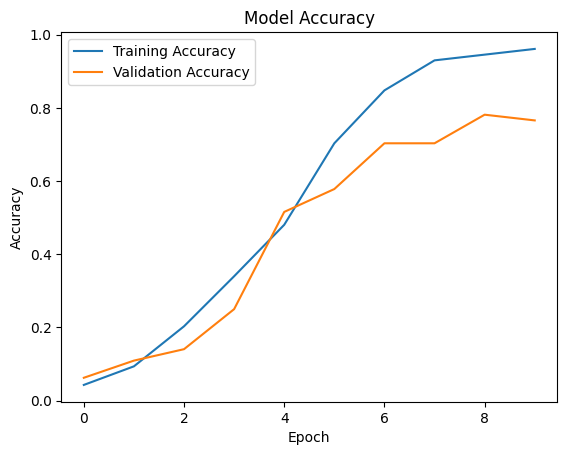

In [ ]:


# Extract accuracy history for both training and validation sets
training_accuracy = H.history['accuracy']
validation_accuracy = H.history['val_accuracy']

# Plot accuracy history for both training and validation sets
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=0)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)

Validation Loss: 1.5305423736572266
Validation Accuracy: 0.703125


In [ ]:
# Save the model
model.save('/kaggle/working/VANILLA_MODEL.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CNNS

In [ ]:
#Define the architecture of the convolutional neural network
model = Sequential()
#Add a conv layer having 8 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(8, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 16 x 16)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
#Reduce the size of the images by 4 using maxpooling layer (image size 4 x 4)
model.add(MaxPooling2D(pool_size=(4, 4)))
#Add a conv layer having 16 filters followed by a relu layer (image size 64 x 64)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#Reduce the size of the images by 2 using maxpooling layer (image size 2 x 2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
#Pass data through a softmax layer
model.add(Dense(40, activation='softmax'))
#Since there are more than 2 classes use categorical_crossentropy, adam optimization and optimize based upon accuracy value
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Print a summary of the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 8)         208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        3216      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 32)        

In [ ]:
#Train the network using the above deinfed network architecture and give accuracy results for training and validation data
# original_image_shape = (64, 64)
# X_train = X_train.reshape(-1, *original_image_shape, 1)
# X_val = X_val.reshape(-1, *original_image_shape, 1)
# X_test = X_test.reshape(-1, *original_image_shape, 1)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2, random_state= 0)

#For training the data has to be split into training and validation, Split training data into training and validation set
#Set validation data size = 20% of training data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=100, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 34ms/step - loss: 3.8980 - accuracy: 0.0156 - val_loss: 3.8271 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 3.7084 - accuracy: 0.0352 - val_loss: 3.7913 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 3.7050 - accuracy: 0.0195 - val_loss: 3.7955 - val_accuracy: 0.0469
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 3.7003 - accuracy: 0.0312 - val_loss: 3.8425 - val_accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 23ms/step - loss: 3.6891 - accuracy: 0.0234 - val_loss: 3.8007 - val_accuracy: 0.0312
Epoch 6/100
16/16 [==============================] - 0s 24ms/step - loss: 3.6735 - accuracy: 0.0234 - val_loss: 3.7584 - val_accuracy: 0.0156
Epoch 7/100
16/16 [==============================] - 0s 23ms/step - loss: 3.6829 - accuracy: 0.0117 - val_loss: 3.7913 - val_accuracy: 0

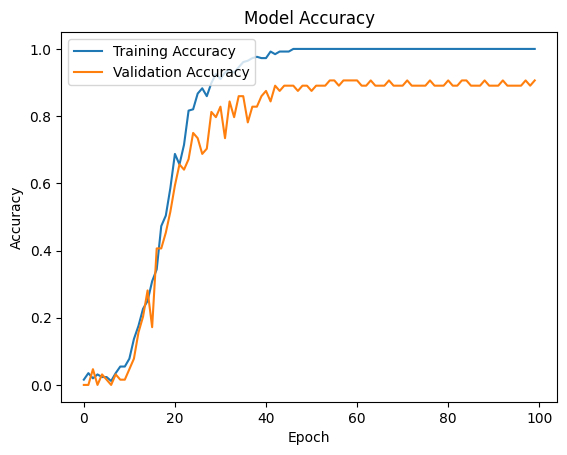

In [ ]:


# Extract accuracy history for both training and validation sets
training_accuracy = H.history['accuracy']
validation_accuracy = H.history['val_accuracy']

# Plot accuracy history for both training and validation sets
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(X_val, Y_val, verbose=0)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)

Validation Loss: 0.26630517840385437
Validation Accuracy: 0.90625


In [ ]:
# Save the model
model.save('/kaggle/working/CNN_MODEL.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
